In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pprint import pprint as pprint
from mpl_toolkits.mplot3d import Axes3D
from os.path import abspath, exists
from os import remove
from itertools import chain

%matplotlib notebook

In [2]:
dataset_frame = pd.read_csv("dataset_frame.csv")

In [3]:
dataset_frame.describe()

,Unnamed: 0,importance,latitude,longitude,prices
count,2000.000000,1227.000000,1227.000000,1227.000000,2.000000e+03
mean,999.500000,0.554560,51.145374,-1.764716,9.997376e+05
std,577.494589,0.083702,3.288205,11.940323,4.829894e+06
min,0.000000,0.201000,-32.996111,-83.457167,9.980000e+02
25%,499.750000,0.510000,51.456565,-0.195780,3.827500e+05
50%,999.500000,0.521000,51.499684,-0.121608,5.250000e+05
75%,1499.250000,0.610000,51.557139,-0.038910,8.100000e+05
max,1999.000000,0.975490,53.806796,122.423345,1.750000e+08


In [4]:
dataset_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
Unnamed: 0      2000 non-null int64
addresses       2000 non-null object
build_status    2000 non-null object
category        1227 non-null object
flat_type       1883 non-null object
importance      1227 non-null float64
latitude        1227 non-null float64
lease_type      2000 non-null object
longitude       1227 non-null float64
prices          2000 non-null float64
sale_dates      2000 non-null object
subcategory     1227 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 187.6+ KB


In [5]:
# We add a new parameter, which we will use to exclude anomalous lat lon coordinates from bad Open Street Map API data.
    
dataset_frame["latitude_z_score"] = (dataset_frame.latitude - dataset_frame.latitude.mean()) / dataset_frame.latitude.std()
dataset_frame["longitude_z_score"] = (dataset_frame.longitude - dataset_frame.longitude.mean()) / dataset_frame.longitude.std()

In [6]:
dataset_frame.latitude_z_score.describe()

count    1.227000e+03
mean    -4.886995e-15
std      1.000000e+00
min     -2.558888e+01
25%      9.463862e-02
50%      1.077516e-01
75%      1.252246e-01
max      8.093845e-01
Name: latitude_z_score, dtype: float64

In [7]:
dataset_frame.longitude_z_score.describe()

count    1.227000e+03
mean     2.387613e-16
std      1.000000e+00
min     -6.841729e+00
25%      1.313981e-01
50%      1.376100e-01
75%      1.445359e-01
max      1.040073e+01
Name: longitude_z_score, dtype: float64

In [8]:
dropped_nas = dataset_frame.dropna()
dropped_nas.describe()

,Unnamed: 0,importance,latitude,longitude,prices,latitude_z_score,longitude_z_score
count,1146.000000,1146.000000,1146.000000,1146.000000,1.146000e+03,1146.000000,1146.000000
mean,986.003490,0.555323,51.187053,-1.727706,8.974187e+05,0.012675,0.003100
std,567.294402,0.081135,3.136518,10.978902,1.133864e+06,0.953869,0.919481
min,2.000000,0.221000,-32.996111,-83.457167,1.000000e+05,-25.588879,-6.841729
25%,493.750000,0.510000,51.455539,-0.195459,4.250000e+05,0.094326,0.131425
50%,997.500000,0.521000,51.499564,-0.117067,5.977500e+05,0.107715,0.137990
75%,1455.500000,0.610000,51.557234,-0.038014,9.300000e+05,0.125254,0.144611
max,1999.000000,0.975490,53.806796,27.930556,1.400000e+07,0.809384,2.486974


In [9]:
dropped_nas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1146 entries, 2 to 1999
Data columns (total 14 columns):
Unnamed: 0           1146 non-null int64
addresses            1146 non-null object
build_status         1146 non-null object
category             1146 non-null object
flat_type            1146 non-null object
importance           1146 non-null float64
latitude             1146 non-null float64
lease_type           1146 non-null object
longitude            1146 non-null float64
prices               1146 non-null float64
sale_dates           1146 non-null object
subcategory          1146 non-null object
latitude_z_score     1146 non-null float64
longitude_z_score    1146 non-null float64
dtypes: float64(6), int64(1), object(7)
memory usage: 134.3+ KB


In [10]:
# We filter out any observations where our latitude or longitude values are more than 1 standard deviations away from the mean.
# All the observations are in London, so any latitude longitude coordinates beyond this range are probably wrong.
df = dropped_nas
df = df[df.latitude_z_score.abs() < 3]
df = df[df.longitude_z_score.abs() < 3]
df.drop(df.columns[0],axis=1)

,addresses,build_status,category,flat_type,importance,latitude,lease_type,longitude,prices,sale_dates,subcategory,latitude_z_score,longitude_z_score
2,"91 Dames Road, London, E7 0DW",Non-Newbuild,highway,Terraced,0.610000,51.553902,Freehold,0.023391,420000.0,2018-09-25,secondary,0.124240,0.149754
3,"82 Ramsay Road, London, E7 9EW",Non-Newbuild,highway,Terraced,0.510000,51.556909,Freehold,0.017585,420000.0,2018-09-25,residential,0.125155,0.149267
4,"21 Mandela Street, London, SW9 6EL",Non-Newbuild,highway,Terraced,0.520000,51.478533,Freehold,-0.110912,560000.0,2018-09-25,residential,0.101319,0.138506
5,"115 Murray Road, London, W5 4DB",Non-Newbuild,highway,Terraced,0.510000,51.493612,Leasehold,-0.313211,495000.0,2018-09-24,residential,0.105905,0.121563
6,"55 Briar Avenue, London, SW16 3AB",Non-Newbuild,highway,Semi Detached,0.610000,51.417612,Freehold,-0.119799,535000.0,2018-09-24,residential,0.082792,0.137762
7,"26 Carlingford Road, London, N15 3EH",Non-Newbuild,highway,Terraced,0.610000,51.589426,Freehold,-0.097470,500000.0,2018-09-24,residential,0.135044,0.139632
8,"30 Darwin Road, London, W5 4BD",Non-Newbuild,highway,Terraced,0.510000,51.494709,Freehold,-0.305955,820000.0,2018-09-24,residential,0.106239,0.122171
10,"Flat 2 59 Dalston Lane, London, E8 2NG",Non-Newbuild,highway,Flat,0.620000,51.546280,Leasehold,-0.069922,795000.0,2018-09-24,primary,0.121922,0.141939
11,"5 Griffins Close, London, N21 2EW",Non-Newbuild,highway,Detached,0.610000,51.633648,Freehold,-0.084601,920000.0,2018-09-24,residential,0.148493,0.140709
12,"56 Chatham Road, Walthamstow, London, E17 6EU",Non-Newbuild,highway,Terraced,0.410000,51.594836,Freehold,0.015356,660000.0,2018-09-21,residential,0.136689,0.149081


<IPython.core.display.Javascript object>


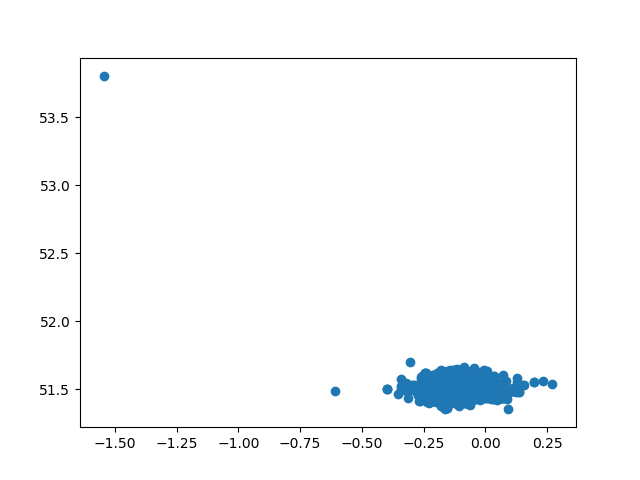

In [11]:
x = df.longitude
y = df.latitude
fig1 = plt.figure()
scat = plt.scatter(x, y)

<IPython.core.display.Javascript object>


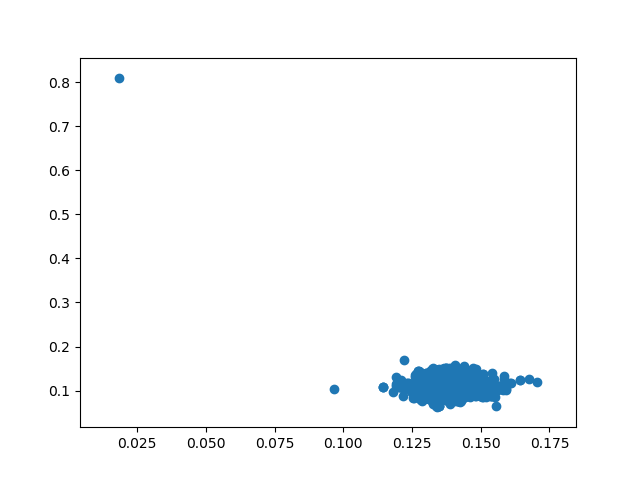

In [12]:
# From the above, we can see that while the first Z score based latitude longitude filtering eliminated most wholly inaccurate
# OSM API response data, it did not eliminate data which was broadly within 3.s.d. on the original dataset, but actually
# incorrect "locally" for London addresses. These anomalies appear to be off near Leeds!
# If we run a scatter graph of the Z-scores from the original dataset, our problem becomes obvious.

x2 = df.longitude_z_score
y2 = df.latitude_z_score
fig2 = plt.figure()
scat = plt.scatter(x2, y2)

<IPython.core.display.Javascript object>


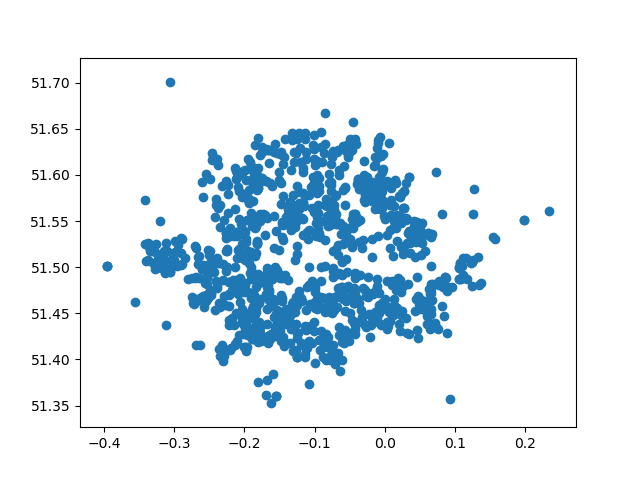

In [13]:
# We will run our filter again by reassiging the latitude and longitude Z-scores and filtering appropriately.

df["latitude_z_score"] = (df.latitude - df.latitude.mean()) / df.latitude.std()
df["longitude_z_score"] = (df.longitude - df.longitude.mean()) / df.longitude.std()
df = df[df.latitude_z_score.abs() < 3]
df = df[df.longitude_z_score.abs() < 3]
df.drop(df.columns[0],axis=1)

x3 = df.longitude
y3 = df.latitude
fig3 = plt.figure()
scat = plt.scatter(x3, y3)

In [14]:
# We will also create dummy variables for all our non-numerical dataseries.
build_status_dummies = pd.get_dummies(df.build_status)
flat_type_dummies = pd.get_dummies(df.flat_type)
lease_type_dummies = pd.get_dummies(df.lease_type)
category_dummies = pd.get_dummies(df.category)
subcategory_dummies = pd.get_dummies(df.subcategory)


dataframes_set = [df, build_status_dummies, flat_type_dummies, lease_type_dummies, category_dummies, subcategory_dummies]
# for dataframe in dataframes_set:
#     dataframe.reset_index(drop=True)
    
df = pd.concat(dataframes_set, axis=1).reset_index(drop=True)
# dataset_frame = pd.concat([dataset_frame, pd.get_dummies(dataset_frame.lease_type)], axis=1)
df = df.drop(df.columns[0],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1116 entries, 0 to 1115
Data columns (total 45 columns):
addresses            1116 non-null object
build_status         1116 non-null object
category             1116 non-null object
flat_type            1116 non-null object
importance           1116 non-null float64
latitude             1116 non-null float64
lease_type           1116 non-null object
longitude            1116 non-null float64
prices               1116 non-null float64
sale_dates           1116 non-null object
subcategory          1116 non-null object
latitude_z_score     1116 non-null float64
longitude_z_score    1116 non-null float64
Non-Newbuild         1116 non-null uint8
Detached             1116 non-null uint8
Flat                 1116 non-null uint8
Semi Detached        1116 non-null uint8
Terraced             1116 non-null uint8
Freehold             1116 non-null uint8
Leasehold            1116 non-null uint8
amenity              1116 non-null uint8
building     

In [15]:
df.head()

,addresses,build_status,category,flat_type,importance,latitude,lease_type,longitude,prices,sale_dates,...,primary,residential,restaurant,secondary,service,suburb,tertiary,trunk,uncategoryified,yes
0,"91 Dames Road, London, E7 0DW",Non-Newbuild,highway,Terraced,0.61,51.553902,Freehold,0.023391,420000.0,2018-09-25,...,0,0,0,1,0,0,0,0,0,0
1,"82 Ramsay Road, London, E7 9EW",Non-Newbuild,highway,Terraced,0.51,51.556909,Freehold,0.017585,420000.0,2018-09-25,...,0,1,0,0,0,0,0,0,0,0
2,"21 Mandela Street, London, SW9 6EL",Non-Newbuild,highway,Terraced,0.52,51.478533,Freehold,-0.110912,560000.0,2018-09-25,...,0,1,0,0,0,0,0,0,0,0
3,"115 Murray Road, London, W5 4DB",Non-Newbuild,highway,Terraced,0.51,51.493612,Leasehold,-0.313211,495000.0,2018-09-24,...,0,1,0,0,0,0,0,0,0,0
4,"55 Briar Avenue, London, SW16 3AB",Non-Newbuild,highway,Semi Detached,0.61,51.417612,Freehold,-0.119799,535000.0,2018-09-24,...,0,1,0,0,0,0,0,0,0,0


In [16]:
cols_to_drop = ["build_status",
                "flat_type",
                "lease_type",
                "category",
                "subcategory",
                "latitude_z_score",
                "longitude_z_score"]

fdf = df.drop(cols_to_drop, axis=1).reset_index(drop=True)

In [17]:
# We save our last dataset before using this in K-Means clustering labelling.
fdf.to_csv("final_dataset_frame.csv")
fdf.to_json("final_dataset_frame.json")

<IPython.core.display.Javascript object>


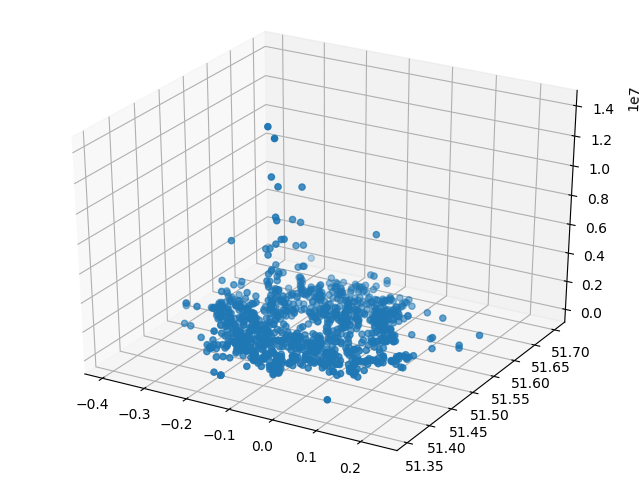

In [18]:
x = fdf.longitude
y = fdf.latitude
z = fdf.prices

fig1 = plt.figure()
ax = Axes3D(fig1)

ax.scatter(x, y, z)

In [19]:
# We will check to see if we have any more non-numeric data, if so, we will drop these series:
fdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1116 entries, 0 to 1115
Data columns (total 38 columns):
addresses          1116 non-null object
importance         1116 non-null float64
latitude           1116 non-null float64
longitude          1116 non-null float64
prices             1116 non-null float64
sale_dates         1116 non-null object
Non-Newbuild       1116 non-null uint8
Detached           1116 non-null uint8
Flat               1116 non-null uint8
Semi Detached      1116 non-null uint8
Terraced           1116 non-null uint8
Freehold           1116 non-null uint8
Leasehold          1116 non-null uint8
amenity            1116 non-null uint8
building           1116 non-null uint8
highway            1116 non-null uint8
landuse            1116 non-null uint8
place              1116 non-null uint8
shop               1116 non-null uint8
cafe               1116 non-null uint8
city               1116 non-null uint8
convenience        1116 non-null uint8
cycleway           1116 n

In [20]:
# It looks like we forgot to get rid of the addresses, so we will do that now.
fdf = fdf.drop(["addresses"], axis=1)

In [21]:
# We can now begin the process of clustering our datapoints into lat-lon clusters.
from sklearn.cluster import KMeans

# We will create our dataframe for the K-means Clustering method for labelling our data.
kmm_X = pd.DataFrame([fdf.latitude, fdf.longitude]).T

# We will specify our model to use 10 clusters; we will not explore cluster optimisation here as it is beyond the scope of this
# exercise.

num_clusters = 10
kmeans = KMeans(n_clusters=num_clusters, max_iter=6000, algorithm = "auto", random_state=0)
kmm = kmeans.fit(kmm_X)
id_label = kmm.labels_

<IPython.core.display.Javascript object>


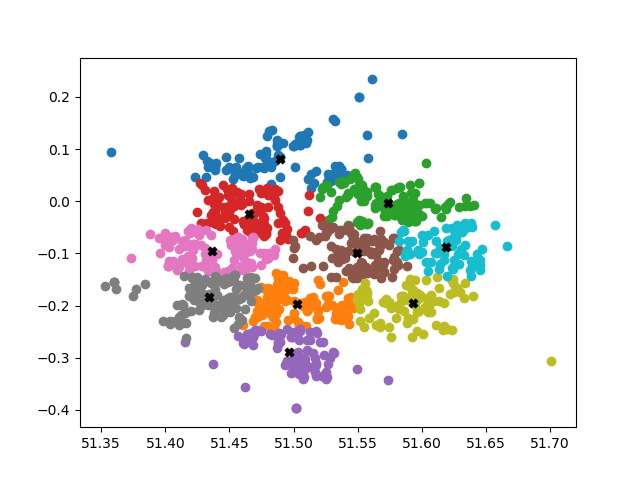

In [22]:
# We will now plot our clusters to see if the labels look correct. We also plot our cluster centres.
fig2 = plt.figure()
for i in xrange(num_clusters):
    cluster = np.where(id_label == i)[0]
    plt.scatter(kmm_X.latitude[cluster].values, kmm_X.longitude[cluster].values)
plt.scatter(kmm.cluster_centers_[:,0], kmm.cluster_centers_[:,1], c="black", marker="X")

In [23]:
# We will now add our cluster labels back to our orginal final dataset frame, and derive dummies.
kmm_label_dummies = subcategory_dummies = pd.get_dummies(kmm.labels_)
fdf = pd.concat([fdf, kmm_label_dummies], axis=1)

In [24]:
fdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1116 entries, 0 to 1115
Data columns (total 47 columns):
importance         1116 non-null float64
latitude           1116 non-null float64
longitude          1116 non-null float64
prices             1116 non-null float64
sale_dates         1116 non-null object
Non-Newbuild       1116 non-null uint8
Detached           1116 non-null uint8
Flat               1116 non-null uint8
Semi Detached      1116 non-null uint8
Terraced           1116 non-null uint8
Freehold           1116 non-null uint8
Leasehold          1116 non-null uint8
amenity            1116 non-null uint8
building           1116 non-null uint8
highway            1116 non-null uint8
landuse            1116 non-null uint8
place              1116 non-null uint8
shop               1116 non-null uint8
cafe               1116 non-null uint8
city               1116 non-null uint8
convenience        1116 non-null uint8
cycleway           1116 non-null uint8
footway            1116 no

In [25]:
# A final peek at our data to ensure it looks vaguely sensible.
fdf.describe()

,importance,latitude,longitude,prices,Non-Newbuild,Detached,Flat,Semi Detached,Terraced,Freehold,...,0,1,2,3,4,5,6,7,8,9
count,1116.000000,1116.000000,1116.000000,1.116000e+03,1116.0,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,...,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000
mean,0.558881,51.509563,-0.110380,8.965905e+05,1.0,0.043907,0.328853,0.149642,0.477599,0.655914,...,0.086022,0.125448,0.119176,0.104839,0.087814,0.095878,0.108423,0.122760,0.083333,0.066308
std,0.078377,0.064802,0.106220,1.135025e+06,0.0,0.204980,0.470007,0.356880,0.499722,0.475282,...,0.280522,0.331375,0.324140,0.306483,0.283151,0.294556,0.311053,0.328308,0.276509,0.248932
min,0.221000,51.352929,-0.396516,1.000000e+05,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.510000,51.459083,-0.190852,4.250000e+05,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.521000,51.501242,-0.113263,5.950000e+05,1.0,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.610000,51.558593,-0.035301,9.300000e+05,1.0,0.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.975490,51.700760,0.234830,1.400000e+07,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
fdf.head()

,importance,latitude,longitude,prices,sale_dates,Non-Newbuild,Detached,Flat,Semi Detached,Terraced,...,0,1,2,3,4,5,6,7,8,9
0,0.61,51.553902,0.023391,420000.0,2018-09-25,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,0.51,51.556909,0.017585,420000.0,2018-09-25,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2,0.52,51.478533,-0.110912,560000.0,2018-09-25,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,0.51,51.493612,-0.313211,495000.0,2018-09-24,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0.61,51.417612,-0.119799,535000.0,2018-09-24,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [27]:
# We will save our dataset in a CSV for use in the next Scratchpad where we explore Random Forest Models, which we will pickle.
# We will use our pickled model as the basis for our RESTful API.
fdf.to_csv("random_forest_dataset.csv")
fdf.to_json("random_forest_dataset.json")